In [1]:
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#To ensure all the plots are displayed in the notebook itself
%matplotlib inline

In [2]:
#Load the dataset into a dataframe names df
df = pd.read_csv('electricity_bill_dataset.csv')

In [3]:
df.head()
#First five rows of the dataset

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [4]:
df.shape

(45345, 12)

In [5]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill'],
      dtype='object')

In [6]:
#display the count of null values in each column
df.isnull().sum()

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

In [7]:
#This command gives the statistical summary of each numeriacl column
df.describe()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.0,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,21.705458,1.503959,12.502635,2.865057,0.0,6.488058,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,0.0,3.443252,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,0.0,1.000000,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,0.0,3.000000,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,0.0,6.000000,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,0.0,9.000000,601.000000,8.900000,5038.800000
max,23.000000,23.000000,3.000000,22.000000,12.000000,0.0,12.000000,926.000000,9.300000,8286.300000


In [8]:
#This command tells the number of unique values in each column
df.nunique()

Fan                  19
Refrigerator          7
AirConditioner        4
Television           20
Monitor               3
MotorPump             1
Month                12
City                 16
Company              32
MonthlyHours        748
TariffRate           16
ElectricityBill    8122
dtype: int64

In [9]:
min(df['MotorPump']) #Min value in the column

0

In [10]:
max(df['MotorPump']) #Max value in the column

0

In [11]:
#Motor Pump column has a consatnt value through out the dataset so it can be removed
df = df.drop('MotorPump',axis=1)

In [12]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill'],
      dtype='object')

In [13]:
#Now we will seperate the feature set and label set
X = df.drop('ElectricityBill',axis=1)
y = df['ElectricityBill']

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fan             45345 non-null  int64  
 1   Refrigerator    45345 non-null  float64
 2   AirConditioner  45345 non-null  float64
 3   Television      45345 non-null  float64
 4   Monitor         45345 non-null  float64
 5   Month           45345 non-null  int64  
 6   City            45345 non-null  object 
 7   Company         45345 non-null  object 
 8   MonthlyHours    45345 non-null  int64  
 9   TariffRate      45345 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.5+ MB


In [15]:
X.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate'],
      dtype='object')

In [16]:
#Seperate the categorical and numerical features so that we can apply respective preprocessing techniques
categorical_features = ['City','Company']
numerical_features = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor','Month',  'MonthlyHours', 'TariffRate']

In [17]:
# Separate the categorical and numerical dataframes
X_cat = X[categorical_features]
X_num = X[numerical_features]

In [18]:
X_cat.head()

,City,Company
0,Hyderabad,Tata Power Company Ltd.
1,Vadodara,NHPC
2,Shimla,Jyoti Structure
3,Mumbai,Power Grid Corp
4,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)


In [19]:
X_num.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,MonthlyHours,TariffRate
0,16,23.0,2.0,6.0,1.0,10,384,8.4
1,19,22.0,2.0,3.0,1.0,5,488,7.8
2,7,20.0,2.0,6.0,7.0,7,416,7.7
3,7,22.0,3.0,21.0,1.0,6,475,9.2
4,11,23.0,2.0,11.0,1.0,2,457,9.2


In [20]:
#use OneHotEncoder to transform the categorical data
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
X_cat_ohe = ohe.fit_transform(X_cat)

In [21]:
#Extract the new column names after encoding and then create a new dataset so that we can merge back with numrerical columns
ohe_feature_names = ohe.get_feature_names_out(categorical_features)
X_cat_ohe_df = pd.DataFrame(X_cat_ohe,columns = ohe_feature_names)

In [22]:
X_cat_ohe_df.columns

Index(['City_Ahmedabad', 'City_Chennai', 'City_Dahej', 'City_Faridabad',
       'City_Gurgaon', 'City_Hyderabad', 'City_Kolkata', 'City_Mumbai',
       'City_Nagpur', 'City_Navi Mumbai', 'City_New Delhi', 'City_Noida',
       'City_Pune', 'City_Ratnagiri', 'City_Shimla', 'City_Vadodara',
       'Company_Adani Power Ltd.',
       'Company_Bonfiglioli Transmission Pvt. Ltd.', 'Company_CESC',
       'Company_GE T&D India Limited', 'Company_Guj Ind Power',
       'Company_Indowind Energy', 'Company_JSW Energy Ltd.',
       'Company_Jaiprakash Power', 'Company_Jyoti Structure',
       'Company_KEC International', 'Company_Kalpataru Power',
       'Company_L&T Transmission & Distribution',
       'Company_Maha Transco – Maharashtra State Electricity Transmission Co, Ltd.',
       'Company_NHPC', 'Company_NLC India', 'Company_NTPC Pvt. Ltd.',
       'Company_Neueon Towers / Sujana Towers Ltd.',
       'Company_Optibelt Power Transmission India Private Limited',
       'Company_Orient Green', 

In [23]:
X_cat_ohe_df.shape

(45345, 48)

In [24]:
X_cat_ohe_df.head()

,City_Ahmedabad,City_Chennai,City_Dahej,City_Faridabad,City_Gurgaon,City_Hyderabad,City_Kolkata,City_Mumbai,City_Nagpur,City_Navi Mumbai,...,Company_Reliance Power,Company_Ringfeder Power Transmission India Pvt. Ltd.,Company_SJVN Ltd.,Company_Sterlite Power Transmission Ltd,Company_Sunil Hitech Eng,Company_Tata Power Company Ltd.,Company_Torrent Power Ltd.,Company_Toshiba Transmission & Distribution Systems (India) Pvt. Ltd.,Company_TransRail Lighting,Company_Unitech Power Transmission Ltd.
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Reset index to ensure proper concatenation
X_num = X_num.reset_index(drop=True)

In [26]:
X_num.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,MonthlyHours,TariffRate
0,16,23.0,2.0,6.0,1.0,10,384,8.4
1,19,22.0,2.0,3.0,1.0,5,488,7.8
2,7,20.0,2.0,6.0,7.0,7,416,7.7
3,7,22.0,3.0,21.0,1.0,6,475,9.2
4,11,23.0,2.0,11.0,1.0,2,457,9.2


In [27]:
#concat the dataframes back to form a preprocessed dataframe
X_processed = pd.concat([X_num,X_cat_ohe_df],axis=1)

In [28]:
X_processed.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,MonthlyHours,TariffRate,City_Ahmedabad,City_Chennai,...,Company_Reliance Power,Company_Ringfeder Power Transmission India Pvt. Ltd.,Company_SJVN Ltd.,Company_Sterlite Power Transmission Ltd,Company_Sunil Hitech Eng,Company_Tata Power Company Ltd.,Company_Torrent Power Ltd.,Company_Toshiba Transmission & Distribution Systems (India) Pvt. Ltd.,Company_TransRail Lighting,Company_Unitech Power Transmission Ltd.
0,16,23.0,2.0,6.0,1.0,10,384,8.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,19,22.0,2.0,3.0,1.0,5,488,7.8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,20.0,2.0,6.0,7.0,7,416,7.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,22.0,3.0,21.0,1.0,6,475,9.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11,23.0,2.0,11.0,1.0,2,457,9.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#Now split the processed data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_processed,y,test_size = 0.2,random_state=42)

In [30]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [31]:
results = pd.DataFrame(columns=['Model','RMSE_mean','R2_mean'])

In [32]:
models.items() #using this we can iterate through the each key value pair in the dictionary

dict_items([('Linear Regression', LinearRegression()), ('Decision Tree', DecisionTreeRegressor(random_state=42)), ('Random Forest', RandomForestRegressor(random_state=42))])

In [33]:
results_list = []
for name,model in models.items():
    #Here we use scikit-learn's neg_mean_squared_error and is negative, so we take the positive sqrt
    rmse_scores = np.sqrt(-cross_val_score(model, X_processed, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1))
    r2_scores = cross_val_score(model, X_processed, y, cv=5, scoring='r2', n_jobs=-1)
    # Store the mean scores
    results_list.append({'Model': name,'RMSE_mean': rmse_scores.mean(),'R2_mean': r2_scores.mean()})

#create the final dataframe from the list of dictionaries
results = pd.DataFrame(results_list)

---
what i have done above :

Iam using three models here and comparing their performance on the cross validation
sets,for that comparison iam using rmse and r2 scores.first i started by iterating
through the each key value pair in the models dictionary and then for each i used 
5 fold cross validation to find the rmse_scores and r2_scores for each model.As it
is a 5 fold rmse_scores and r2_scores will have 5 values per model because of 
different possible splits and then at the end of the iteration i append the values into a list called results_list, and after the end of the for loop i have created a data frame from that results_list which is nothing but the list of dictionaries.So from that data frame i can see the performance of each model on the cross validation set and decide which model does better.n_jobs = -1 is used for the parallel computing to decrease the computing time.

And also the reason iam not using XGBoost here is that it is not regarded as the traditional ML model, but as specified in the instructions only to use traditional ML models iam using Random Forest which is also a tree ensemble.

---

In [34]:
rmse_scores #as the loop has ended these are the values of the last model(Random forest)

array([6.01486948, 6.49153483, 5.61374959, 6.52313637, 6.46816088])

In [35]:
r2_scores #as the loop has ended these are the values of the last model(Random forest)

array([0.99996876, 0.99996267, 0.99997289, 0.99996367, 0.99996346])

In [36]:
results

,Model,RMSE_mean,R2_mean
0,Linear Regression,70.806329,0.995651
1,Decision Tree,10.717258,0.999897
2,Random Forest,6.222290,0.999966


In [47]:
#from the above results we can conclude that Random Forest is best

#now lets use the grid search cv to find the best combination of the hyperparameters for the random forest.
"""
model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[10,20,None],
    'min_samples_leaf':[1,2,4]
}
#instantiaste the GridSearchCV
grid_search = GridSearchCV(model,param_grid,cv=5,scoring='r2',n_jobs=-1,verbose=1)
#fit the model on our 
grid_search.fit(X_train,y_train)

optimal_model = grid_search.best_estimator_

"""

"\nmodel = RandomForestRegressor(random_state=42)\n\nparam_grid = {\n    'n_estimators':[100,200,300],\n    'max_depth':[10,20,None],\n    'min_samples_leaf':[1,2,4]\n}\n#instantiaste the GridSearchCV\ngrid_search = GridSearchCV(model,param_grid,cv=5,scoring='r2',n_jobs=-1,verbose=1)\n#fit the model on our \ngrid_search.fit(X_train,y_train)\n\noptimal_model = grid_search.best_estimator_\n\n"

---
Grid search finds the best parameters for the model from the provided choice of parameters,what we do here is fit the grid search on the train set because fitting on total data will lead to data leakage, and causes overfitting of the model with high variance and the model cannot generalise to unseen samples.Here also we are using cv=5 which means 5 fold cross validation.

what is 5 fold cross validation:

consider a dataset x, in this process the dataset x is divided into 5 parts consider x1,x2,x3,x4,x5. Now 5 fold cross validation will first train the model on x1,x2,x3,x4 and test the performance on x5.Then in the next step the model will be trained on x1,x2,x3,x5 and tested on x4.and soon 5 using 5 different possible choices.Here the testing is evaluated using the metric provided like here iam using the r2 score.

n_jobs=-1 used for parallel computing all the possible 5 folds are computed at the same time. verbose = 1 controls the information displayed during the GridSearch is running. for example if you run the above cell you can see a message which goes like this "Fitting 5 folds for each of 27 candidates, totalling 135 fits" which confirms that Grid Search is running and the code has not frozen or any other issue.

---

The grid search is taking a lot lot more time, because of the deadline constraint iam directly initialising values instead of doing grid search

In [38]:
optimal_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_leaf=1,
    random_state=42
)

In [39]:
#fit the model
optimal_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, random_state=42)

In [40]:
#make predictions from the model
y_pred = optimal_model.predict(X_test)

In [41]:
# Calculate final evaluation metrics (RMSE and R²)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
final_r2 = r2_score(y_test, y_pred)

In [42]:
final_rmse

5.355097450479262

In [43]:
final_r2

0.9999748318494079

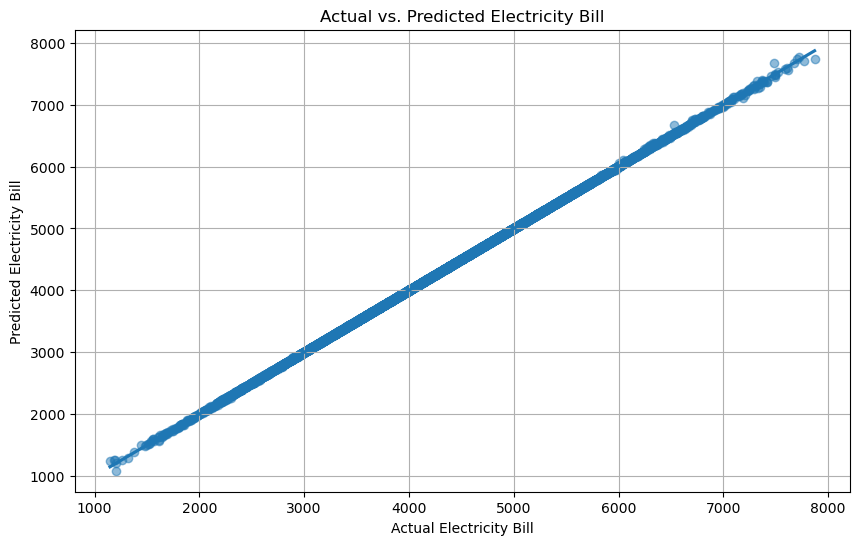

In [44]:
#Plotting predicted vs. actual values to show model accuracy
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.xlabel('Actual Electricity Bill')
plt.ylabel('Predicted Electricity Bill')
plt.title('Actual vs. Predicted Electricity Bill')
plt.grid(True)
plt.show()

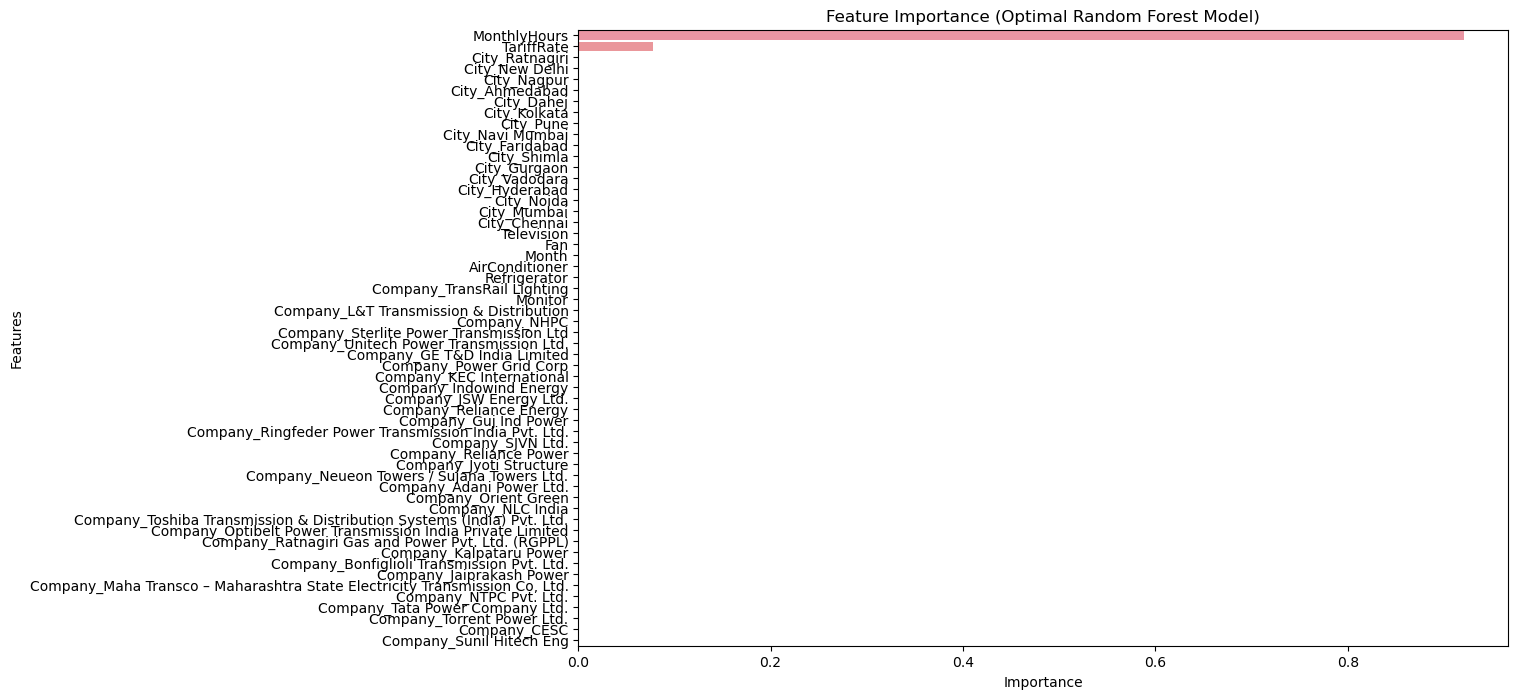

In [45]:
#Visualize Feature Importance to show how each feature impacted the predictions
feature_importances = pd.Series(optimal_model.feature_importances_, index=X_test.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance (Optimal Random Forest Model)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

---
                                                        THANK YOU

---                                            